Best PSNR Parameters: Kernel Size = 7, Sigma Color = 130, Sigma Space = 130
Best SSIM Parameters: Kernel Size = 5, Sigma Color = 130, Sigma Space = 130
PSNR for Noisy Image: 19.89
PSNR for Denoised Image: 28.22
SSIM for Noisy Image: 0.58
SSIM for Denoised Image: 0.79


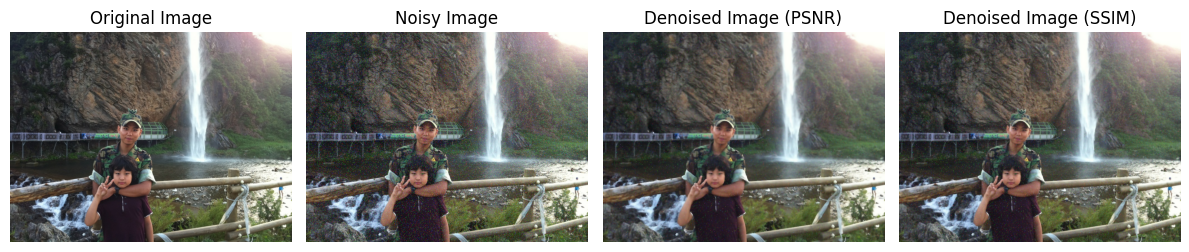

In [61]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# 원본 이미지 로드 또는 생성
original_image = cv2.imread("./img/image.jpg", cv2.IMREAD_COLOR)

# 가우시안 노이즈 생성 및 추가
noise_sigma = 0.5
noise = np.random.normal(0, noise_sigma, original_image.shape).astype(np.uint8)
noisy_image = cv2.add(original_image, noise)

# 그리드 서치를 위한 파라미터 조합
kernel_sizes = [1, 3, 5, 7, 9, 11, 13]
sigma_colors = [1, 5, 10, 30, 50, 70, 90, 100, 110, 130]
sigma_spaces = [1, 5, 10, 30, 50, 70, 90, 100, 110, 130]

best_psnr = -np.inf
best_ssim = -np.inf
best_params = {}

# 그리드 서치 실행
for kernel_size in kernel_sizes:
    for sigma_color in sigma_colors:
        for sigma_space in sigma_spaces:
            denoised_image = cv2.bilateralFilter(noisy_image, kernel_size, sigma_color, sigma_space)
            
            # PSNR 계산
            psnr_noisy = cv2.PSNR(original_image, noisy_image)
            psnr_denoised = cv2.PSNR(original_image, denoised_image)
            
            # SSIM 계산
            ssim_noisy = ssim(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY),
                              cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY))
            ssim_denoised = ssim(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY),
                                 cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY))
            
            if psnr_denoised > best_psnr:
                best_psnr = psnr_denoised
                best_params['psnr'] = (kernel_size, sigma_color, sigma_space)
                best_denoised_image_psnr = denoised_image
            
            if ssim_denoised > best_ssim:
                best_ssim = ssim_denoised
                best_params['ssim'] = (kernel_size, sigma_color, sigma_space)
                best_denoised_image_ssim = denoised_image

psnr_denoised = cv2.PSNR(original_image, best_denoised_image_psnr)
ssim_denoised = ssim(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY),
                         cv2.cvtColor(best_denoised_image_ssim, cv2.COLOR_BGR2GRAY))

print(f"Best PSNR Parameters: Kernel Size = {best_params['psnr'][0]}, Sigma Color = {best_params['psnr'][1]}, Sigma Space = {best_params['psnr'][2]}")
print(f"Best SSIM Parameters: Kernel Size = {best_params['ssim'][0]}, Sigma Color = {best_params['ssim'][1]}, Sigma Space = {best_params['ssim'][2]}")
print(f"PSNR for Noisy Image: {psnr_noisy:.2f}")
print(f"PSNR for Denoised Image: {psnr_denoised:.2f}")
print(f"SSIM for Noisy Image: {ssim_noisy:.2f}")
print(f"SSIM for Denoised Image: {ssim_denoised:.2f}")

# 이미지 출력
plt.figure(figsize=(12, 6))

# 원본 이미지
plt.subplot(141)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# 노이즈가 섞인 이미지
plt.subplot(142)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image")
plt.axis("off")

# 최적 파라미터로 디노이즈된 이미지 (PSNR)
plt.subplot(143)
plt.imshow(cv2.cvtColor(best_denoised_image_psnr, cv2.COLOR_BGR2RGB))
plt.title("Denoised Image (PSNR)")
plt.axis("off")

# 최적 파라미터로 디노이즈된 이미지 (SSIM)
plt.subplot(144)
plt.imshow(cv2.cvtColor(best_denoised_image_ssim, cv2.COLOR_BGR2RGB))
plt.title("Denoised Image (SSIM)")
plt.axis("off")

plt.tight_layout()
plt.show()


Best PSNR Parameters: Kernel Size = 9, Sigma Color = 130, Sigma Space = 5
Best SSIM Parameters: Kernel Size = 11, Sigma Color = 110, Sigma Space = 5
PSNR for Noisy Image: 20.29
PSNR for Denoised Image: 27.41
SSIM for Noisy Image: 0.59
SSIM for Denoised Image: 0.83


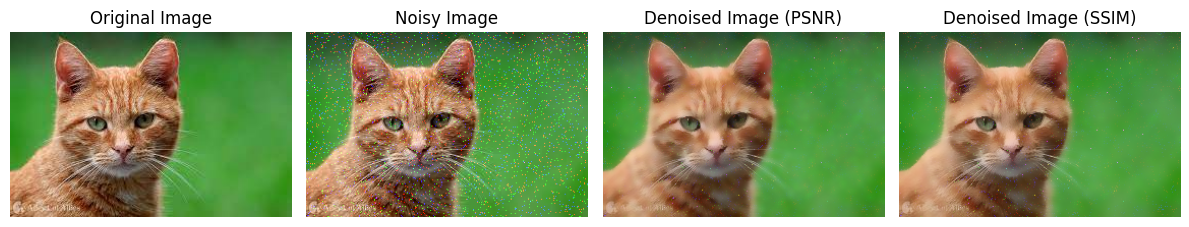

In [60]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# 원본 이미지 로드 또는 생성
original_image = cv2.imread("./img/cat.jpg", cv2.IMREAD_COLOR)

# 가우시안 노이즈 생성 및 추가
noise_sigma = 0.5
noise = np.random.normal(0, noise_sigma, original_image.shape).astype(np.uint8)
noisy_image = cv2.add(original_image, noise)

# 그리드 서치를 위한 파라미터 조합
kernel_sizes = [1, 3, 5, 7, 9, 11, 13]
sigma_colors = [1, 5, 10, 30, 50, 70, 90, 100, 110, 130]
sigma_spaces = [1, 5, 10, 30, 50, 70, 90, 100, 110, 130]

best_psnr = -np.inf
best_ssim = -np.inf
best_params = {}

# 그리드 서치 실행
for kernel_size in kernel_sizes:
    for sigma_color in sigma_colors:
        for sigma_space in sigma_spaces:
            denoised_image = cv2.bilateralFilter(noisy_image, kernel_size, sigma_color, sigma_space)
            
            # PSNR 계산
            psnr_noisy = cv2.PSNR(original_image, noisy_image)
            psnr_denoised = cv2.PSNR(original_image, denoised_image)

            # SSIM 계산
            ssim_noisy = ssim(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY),
                              cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY))
            ssim_denoised = ssim(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY),
                                 cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY))
            
            if psnr_denoised > best_psnr:
                best_psnr = psnr_denoised
                best_params['psnr'] = (kernel_size, sigma_color, sigma_space)
                best_denoised_image_psnr = denoised_image
            
            if ssim_denoised > best_ssim:
                best_ssim = ssim_denoised
                best_params['ssim'] = (kernel_size, sigma_color, sigma_space)
                best_denoised_image_ssim = denoised_image

psnr_denoised = cv2.PSNR(original_image, best_denoised_image_psnr)
ssim_denoised = ssim(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY),
                         cv2.cvtColor(best_denoised_image_ssim, cv2.COLOR_BGR2GRAY))

print(f"Best PSNR Parameters: Kernel Size = {best_params['psnr'][0]}, Sigma Color = {best_params['psnr'][1]}, Sigma Space = {best_params['psnr'][2]}")
print(f"Best SSIM Parameters: Kernel Size = {best_params['ssim'][0]}, Sigma Color = {best_params['ssim'][1]}, Sigma Space = {best_params['ssim'][2]}")
print(f"PSNR for Noisy Image: {psnr_noisy:.2f}")
print(f"PSNR for Denoised Image: {psnr_denoised:.2f}")
print(f"SSIM for Noisy Image: {ssim_noisy:.2f}")
print(f"SSIM for Denoised Image: {ssim_denoised:.2f}")

# 이미지 출력
plt.figure(figsize=(12, 6))

# 원본 이미지
plt.subplot(141)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# 노이즈가 섞인 이미지
plt.subplot(142)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image")
plt.axis("off")

# 최적 파라미터로 디노이즈된 이미지 (PSNR)
plt.subplot(143)
plt.imshow(cv2.cvtColor(best_denoised_image_psnr, cv2.COLOR_BGR2RGB))
plt.title("Denoised Image (PSNR)")
plt.axis("off")

# 최적 파라미터로 디노이즈된 이미지 (SSIM)
plt.subplot(144)
plt.imshow(cv2.cvtColor(best_denoised_image_ssim, cv2.COLOR_BGR2RGB))
plt.title("Denoised Image (SSIM)")
plt.axis("off")

plt.tight_layout()
plt.show()


Best PSNR Parameters: Kernel Size = 7, Sigma Color = 130, Sigma Space = 5
Best SSIM Parameters: Kernel Size = 5, Sigma Color = 130, Sigma Space = 70
PSNR for Noisy Image: 21.80
PSNR for Denoised Image: 28.60
SSIM for Noisy Image: 0.69
SSIM for Denoised Image: 0.86


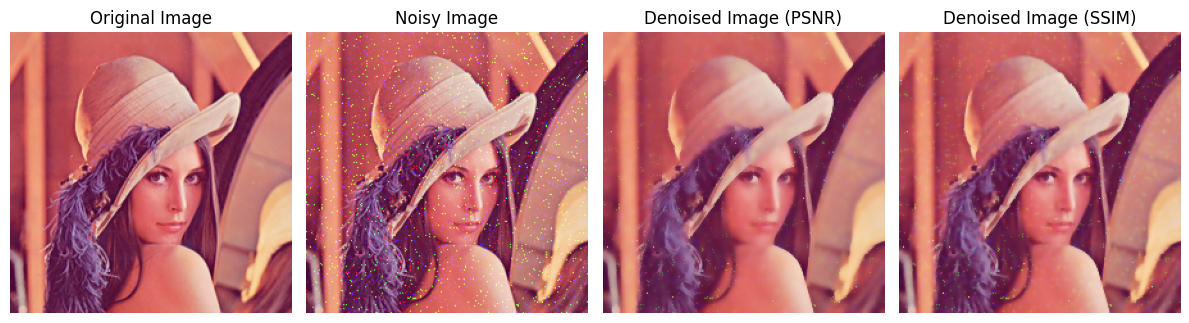

In [59]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# 원본 이미지 로드 또는 생성
original_image = cv2.imread("./img/Lenna.png", cv2.IMREAD_COLOR)

# 가우시안 노이즈 생성 및 추가
noise_sigma = 0.5
noise = np.random.normal(0, noise_sigma, original_image.shape).astype(np.uint8)
noisy_image = cv2.add(original_image, noise)

# 그리드 서치를 위한 파라미터 조합
kernel_sizes = [1, 3, 5, 7, 9, 11, 13]
sigma_colors = [1, 5, 10, 30, 50, 70, 90, 100, 110, 130]
sigma_spaces = [1, 5, 10, 30, 50, 70, 90, 100, 110, 130]

best_psnr = -np.inf
best_ssim = -np.inf
best_params = {}

# 그리드 서치 실행
for kernel_size in kernel_sizes:
    for sigma_color in sigma_colors:
        for sigma_space in sigma_spaces:
            denoised_image = cv2.bilateralFilter(noisy_image, kernel_size, sigma_color, sigma_space)
            
            # PSNR 계산
            psnr_noisy = cv2.PSNR(original_image, noisy_image)
            psnr_denoised = cv2.PSNR(original_image, denoised_image)
            
            # SSIM 계산
            ssim_noisy = ssim(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY),
                              cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY))
            ssim_denoised = ssim(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY),
                                 cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY))
            
            if psnr_denoised > best_psnr:
                best_psnr = psnr_denoised
                best_params['psnr'] = (kernel_size, sigma_color, sigma_space)
                best_denoised_image_psnr = denoised_image
            
            if ssim_denoised > best_ssim:
                best_ssim = ssim_denoised
                best_params['ssim'] = (kernel_size, sigma_color, sigma_space)
                best_denoised_image_ssim = denoised_image

psnr_denoised = cv2.PSNR(original_image, best_denoised_image_psnr)
ssim_denoised = ssim(cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY),
                         cv2.cvtColor(best_denoised_image_ssim, cv2.COLOR_BGR2GRAY))

print(f"Best PSNR Parameters: Kernel Size = {best_params['psnr'][0]}, Sigma Color = {best_params['psnr'][1]}, Sigma Space = {best_params['psnr'][2]}")
print(f"Best SSIM Parameters: Kernel Size = {best_params['ssim'][0]}, Sigma Color = {best_params['ssim'][1]}, Sigma Space = {best_params['ssim'][2]}")
print(f"PSNR for Noisy Image: {psnr_noisy:.2f}")
print(f"PSNR for Denoised Image: {psnr_denoised:.2f}")
print(f"SSIM for Noisy Image: {ssim_noisy:.2f}")
print(f"SSIM for Denoised Image: {ssim_denoised:.2f}")

# 이미지 출력
plt.figure(figsize=(12, 6))

# 원본 이미지
plt.subplot(141)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# 노이즈가 섞인 이미지
plt.subplot(142)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image")
plt.axis("off")

# 최적 파라미터로 디노이즈된 이미지 (PSNR)
plt.subplot(143)
plt.imshow(cv2.cvtColor(best_denoised_image_psnr, cv2.COLOR_BGR2RGB))
plt.title("Denoised Image (PSNR)")
plt.axis("off")

# 최적 파라미터로 디노이즈된 이미지 (SSIM)
plt.subplot(144)
plt.imshow(cv2.cvtColor(best_denoised_image_ssim, cv2.COLOR_BGR2RGB))
plt.title("Denoised Image (SSIM)")
plt.axis("off")

plt.tight_layout()
plt.show()
